In [1]:
# Carreon, Ma. Addine Anne T.
# A1
# CS158-1L
# December 16, 2023 

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,8)

In [4]:
data = pd.read_csv('bike_sharing.txt')

In [5]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


Text(0.5, 1.0, 'Profit in $10000 vs City Population in 10000')

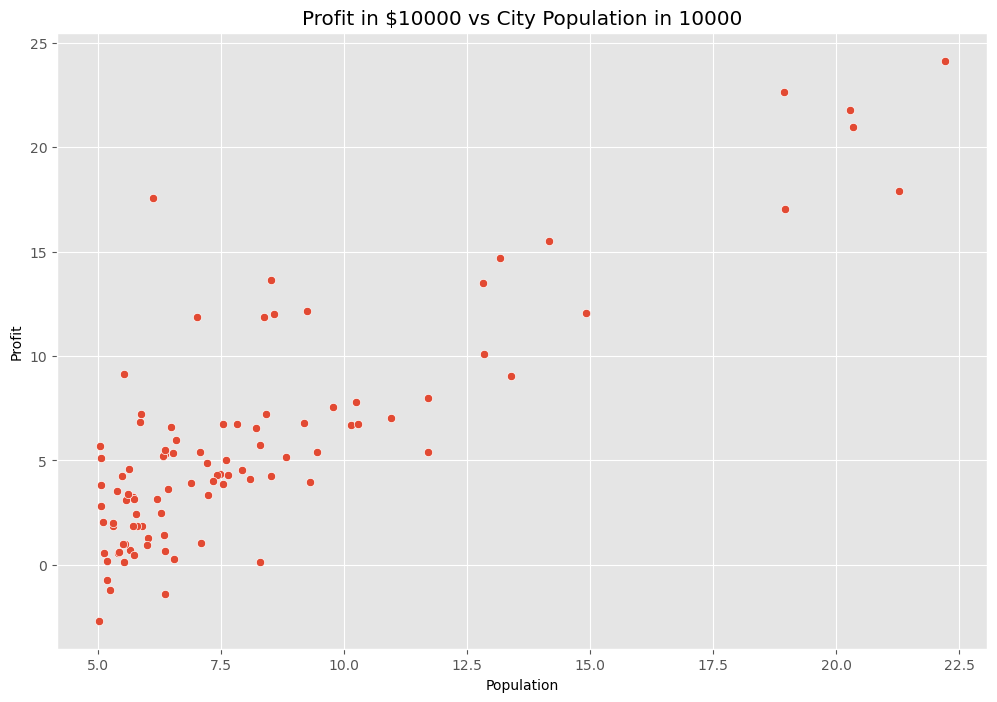

In [7]:
ax = sns.scatterplot(x = 'Population', y = 'Profit', data = data) 
ax.set_title('Profit in $10000 vs City Population in 10000')

In [8]:
def cost_function(x, y, theta):
    m = len(y)
    y_pred = x.dot(theta)
    error = (y_pred - y) **2
    
    return 1/(2*m) * np.sum(error)

In [9]:
m = data.Population.values.size
X = np.append(np.ones((m,1)), data. Population.values.reshape(m,1), axis = 1)
y = data. Profit.values.reshape(m,1)

theta = np.zeros((2,1))

cost_function(X,y, theta)

32.072733877455676

In [10]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot (X.transpose(),(y_pred - y))
        theta -= alpha * 1 / m * error
        costs.append(cost_function(X,y, theta))
        
    return theta, costs

In [11]:
theta, costs = gradient_descent(X,y,theta, alpha= 0.01, iterations = 2000)
print('h(x) = {} + {}x1'.format(str(round(theta[0,0],2)), str(round(theta[1,0],2))))

h(x) = -3.79 + 1.18x1


In [12]:
from mpl_toolkits.mplot3d  import Axes3D

In [13]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i,j] = cost_function(X,y,t)

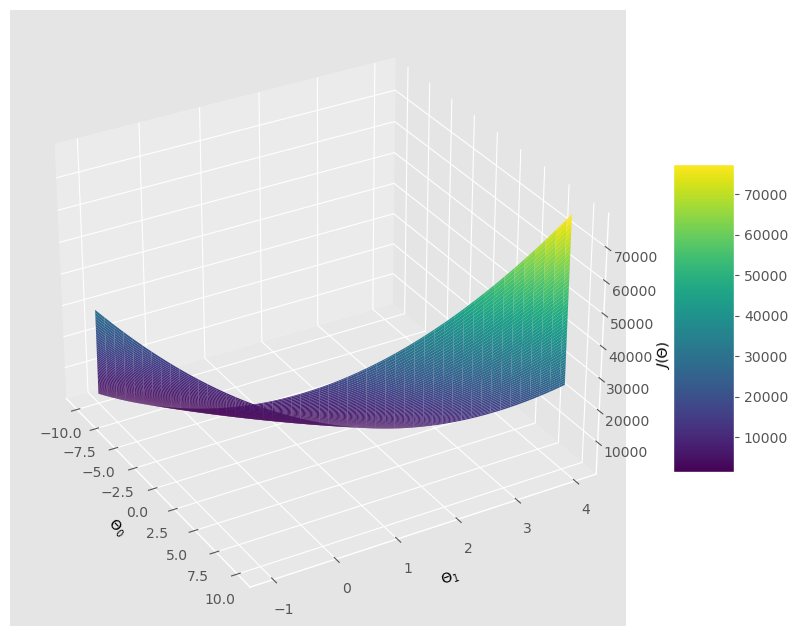

In [14]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')  # Use add_subplot with projection='3d'

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('$J(\Theta)$')
ax.view_init(30, 330)

plt.show()

Text(0.5, 1.0, 'Values of the Cost function over iterations of Gradient Descent')

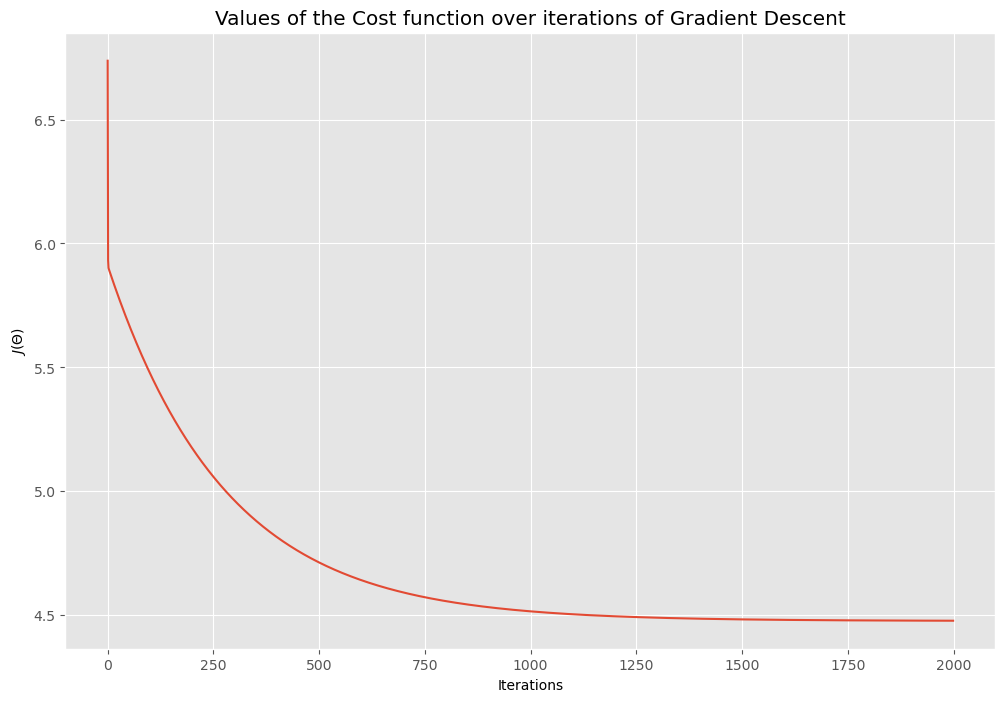

In [15]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title('Values of the Cost function over iterations of Gradient Descent')

Text(0.5, 1.0, 'Linear Regression Fit')

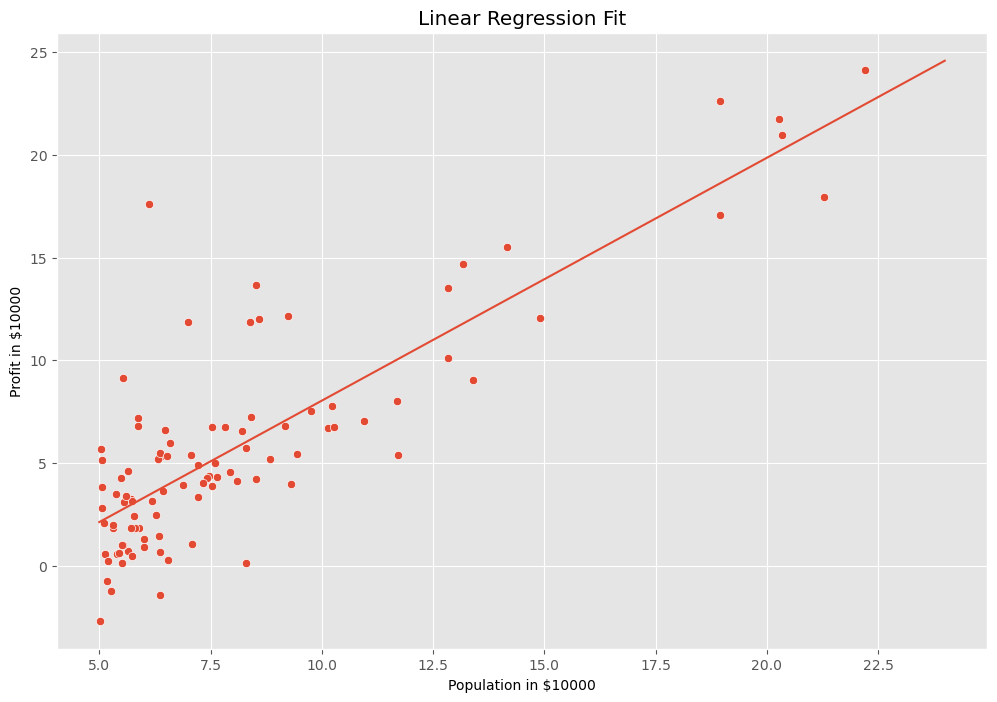

In [16]:
theta = np.squeeze(theta)
sns.scatterplot(x = 'Population', y = 'Profit', data = data)

x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1]) + theta[0] for x in x_value]

sns.lineplot(x = x_value, y = y_value)

plt.xlabel('Population in $10000')
plt.ylabel('Profit in $10000')
plt.title('Linear Regression Fit')

In [17]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(),x)
    
    return y_pred

In [18]:
y_pred_1 = predict(np.array([1,4]), theta)* 100000
print('For a population of 100000 people, the model predicts a profit of $' + str(round(y_pred_1,0)))

For a population of 100000 people, the model predicts a profit of $94078.0
